In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing

In [2]:
#Dataset taken from
#https://www.kaggle.com/saptarsi/naiveflu?select=naivebayes.csv

dftrain = pd.read_csv("naivebayes.csv")
dftrain.head(10)

,Chills,runny nose,head ache,fever,Flu
0,Y,N,Mild,Y,N
1,Y,Y,No,N,Y
2,Y,N,Strong,Y,Y
3,N,Y,Mild,Y,Y
4,N,N,No,N,N
5,N,Y,Strong,Y,Y
6,N,Y,Strong,N,N
7,Y,Y,Mild,Y,Y


<AxesSubplot:xlabel='Chills,Flu'>

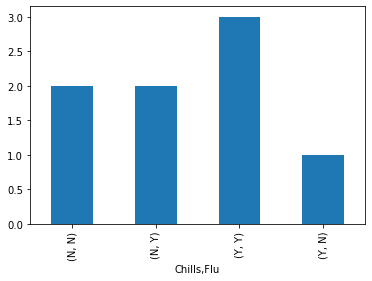

In [3]:
dftrain.groupby('Chills')['Flu'].value_counts().plot(kind= 'bar')

<AxesSubplot:xlabel='runny nose,Flu'>

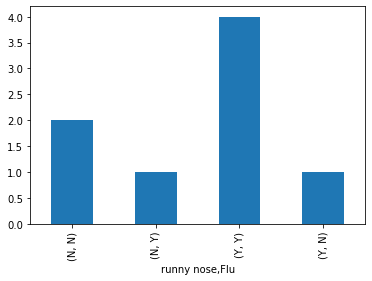

In [4]:
dftrain.groupby('runny nose')['Flu'].value_counts().plot(kind= 'bar')

<AxesSubplot:xlabel='head ache,Flu'>

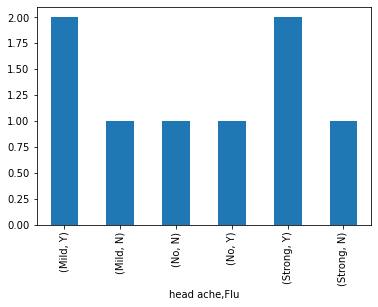

In [5]:
dftrain.groupby('head ache')['Flu'].value_counts().plot(kind= 'bar')

<AxesSubplot:xlabel='fever,Flu'>

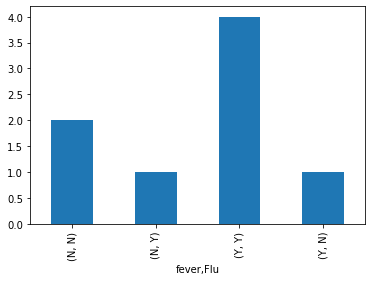

In [6]:
dftrain.groupby('fever')['Flu'].value_counts().plot(kind= 'bar')

In [7]:
x1= dftrain.iloc[:,0]
x2= dftrain.iloc[:,1]
x3= dftrain.iloc[:,2]
x4= dftrain.iloc[:,3]
y=  dftrain.iloc[:,4]
list(dftrain.index[:4])

[0, 1, 2, 3]

In [8]:
#Label Encoding
le = preprocessing.LabelEncoder()
x1= le.fit_transform(x1)
x2= le.fit_transform(x2)
x3= le.fit_transform(x3)
x4= le.fit_transform(x4)
y=le.fit_transform(y)

X = pd.DataFrame(list(zip(x1,x2,x3,x4)))
X


,0,1,2,3
0,1,0,0,1
1,1,1,1,0
2,1,0,2,1
3,0,1,0,1
4,0,0,1,0
5,0,1,2,1
6,0,1,2,0
7,1,1,0,1


In [25]:
model = CategoricalNB()
model.alpha = 0
#model.fit_prior = False

model.fit(X,y)

#Predict Output
# mild = 0 , No = 1 , Strong = 2
#[Chills, RN, HA, Fever]
ll = [[1,0,0,1]]
predicted = model.predict(ll) 
if predicted[0] == 1:
    print("You likely have Flu\n")
else:
    print("Whew, You don't have Flu\n")
    
print("Probabilities:")
print(model.predict_proba(ll))

You likely have Flu

Probabilities:
[[0.27839644 0.72160356]]


C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
print(model.get_params())